### ANÁLISE DE DADOS: ###

Este dataset inclui dados de músicas antigas e contemporâneas do Spotify (principalmente de 2025). Cada linha representa uma única faixa, juntamente com o artista, o álbum e os dados referentes a: popularidade, seguidores, gêneros, duração da música, id da música, e se é explícita ou não.

In [128]:
### IMPORTAÇÕES ###

import pandas as pd
import ast
import matplotlib.pyplot as plt
from collections import Counter

In [129]:
### LEITURA DO DATASET ###
df = pd.read_csv('../data/track_data_final.csv')
pd.reset_option('all')

C:\Users\rhts4\AppData\Local\Temp\ipykernel_16488\1405114926.py:3: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
C:\Users\rhts4\AppData\Local\Temp\ipykernel_16488\1405114926.py:3: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [130]:
### visualização da estrutura da tabela ###
df.head()

,track_id,track_name,track_number,track_popularity,track_duration_ms,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type
0,6pymOcrCnMuCWdgGVTvUgP,3,57,61,213173,False,Britney Spears,80.0,17755451.0,['pop'],325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,2009-11-09,58,compilation
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1,67,158760,False,BUNT.,69.0,293734.0,['stutter house'],2ArRQNLxf9t0O0gvmG5Vsj,Clouds,2023-01-13,1,single
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11,63,225328,False,Taylor Swift,100.0,145396321.0,[],4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,26,album
3,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,2,72,158463,True,Billie Eilish,90.0,118692183.0,[],0JGOiO34nwfUdDrD612dOp,Happier Than Ever,2021-07-30,16,album
4,0GLfodYacy3BJE7AI3A8en,Man Down,7,57,267013,False,Rihanna,90.0,68997177.0,[],5QG3tjE5L9F6O2vCAPph38,Loud,2010-01-01,13,album


In [131]:
### visualização das informações iniciais da tabela ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8778 entries, 0 to 8777
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8778 non-null   object 
 1   track_name          8776 non-null   object 
 2   track_number        8778 non-null   int64  
 3   track_popularity    8778 non-null   int64  
 4   track_duration_ms   8778 non-null   int64  
 5   explicit            8778 non-null   bool   
 6   artist_name         8774 non-null   object 
 7   artist_popularity   8774 non-null   float64
 8   artist_followers    8774 non-null   float64
 9   artist_genres       8774 non-null   object 
 10  album_id            8778 non-null   object 
 11  album_name          8776 non-null   object 
 12  album_release_date  8778 non-null   object 
 13  album_total_tracks  8778 non-null   int64  
 14  album_type          8778 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(8)
memory usag

In [132]:
df.describe()

,track_number,track_popularity,track_duration_ms,artist_popularity,artist_followers,album_total_tracks
count,8778.000000,8778.000000,8778.000000,8774.000000,8.774000e+03,8778.000000
mean,5.749487,52.232855,210157.791866,69.954981,2.435487e+07,13.779790
std,6.017938,24.075221,63326.841454,19.532783,3.813769e+07,11.797943
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000
25%,1.000000,39.000000,173921.250000,60.000000,5.152768e+05,6.000000
50%,4.000000,58.000000,207276.000000,74.000000,6.272266e+06,13.000000
75%,9.000000,71.000000,239693.250000,84.000000,3.055055e+07,17.000000
max,102.000000,100.000000,811077.000000,100.000000,1.455421e+08,181.000000


In [133]:
### visualização das colunas que possuem valores nulos. E respectivamente quantos cada uma possui  ###
df.isnull().sum()

track_id              0
track_name            2
track_number          0
track_popularity      0
track_duration_ms     0
explicit              0
artist_name           4
artist_popularity     4
artist_followers      4
artist_genres         4
album_id              0
album_name            2
album_release_date    0
album_total_tracks    0
album_type            0
dtype: int64

CONVERSÃO DA COLUNA 'album_release_date' que inicialmente estava em "str" para "datetime".

In [134]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')

In [135]:
### checando tipo ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8778 entries, 0 to 8777
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   track_id            8778 non-null   object        
 1   track_name          8776 non-null   object        
 2   track_number        8778 non-null   int64         
 3   track_popularity    8778 non-null   int64         
 4   track_duration_ms   8778 non-null   int64         
 5   explicit            8778 non-null   bool          
 6   artist_name         8774 non-null   object        
 7   artist_popularity   8774 non-null   float64       
 8   artist_followers    8774 non-null   float64       
 9   artist_genres       8774 non-null   object        
 10  album_id            8778 non-null   object        
 11  album_name          8776 non-null   object        
 12  album_release_date  8577 non-null   datetime64[ns]
 13  album_total_tracks  8778 non-null   int64       

In [136]:
### visualização das colunas "album_release_date" que possuem valores Nat ###
df[df["album_release_date"].isna()].head(20)

,track_id,track_name,track_number,track_popularity,track_duration_ms,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type
27,3RaqIAipLoQLVVNm41IMnJ,Did It Again,2,0,192706,False,Shakira,85.0,39777995.0,['latin pop'],5u0OuxRnf3FzvZR07xAxL2,She Wolf (Expanded Edition),NaT,16,album
49,4w3tQBXhn5345eUXDGBWZG,9 to 5,1,75,162466,False,Dolly Parton,70.0,2969733.0,"['country', 'classic country']",64Ky1tqKPfwxhJs6msphWd,9 To 5 And Odd Jobs,NaT,10,album
67,37IZHbmUmuhZITM4SW6PtV,My Bubble Gum,3,38,208520,False,Rasheeda,53.0,202732.0,[],2n2sXuFZW2FrhI8JYhicI7,Dat Type Of Gurl,NaT,16,album
87,4hrAKlxfblnG7llBEEX7TR,Run,17,59,314720,False,Leona Lewis,65.0,3786304.0,[],7t1veDv7FWHYXskQEoU7dq,Spirit,NaT,17,album
92,7pE1oIwO0JkKej4UJDR394,Popular,8,38,163480,False,The Veronicas,55.0,984364.0,[],7ByjOOmDkEgm1HC9LwOPNg,Hook Me Up,NaT,16,album
133,4DPdJvSMB6hmrjgC5eC85d,Iris,1,63,289533,False,The Goo Goo Dolls,76.0,3491229.0,[],7ttozw5DWCdQaqfzCMevPc,Stay with You,NaT,3,single
147,0AQquaENerGps8BQmbPw14,Big Iron,1,71,235733,False,Marty Robbins,60.0,626733.0,"['classic country', 'outlaw country']",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,NaT,15,album
181,1fidCEsYlaVE3pHwKCvpFZ,Am I Wrong,2,78,245866,False,Nico & Vinz,61.0,573365.0,[],6zXb9FQMzawvY2Au8Kxky3,Black Star Elephant,NaT,21,album
192,6BrMEbPSSj55nQhkgf6DnE,"Please, Please, Please, Let Me Get What I Want...",16,78,112706,False,The Smiths,78.0,7728723.0,"['new wave', 'madchester', 'jangle pop']",1j57Q5ntVi7crpibb0h4sv,Hatful of Hollow,NaT,16,compilation
230,3sOhS9SLsbY3fG1nVVk00P,Take Me on the Floor,6,45,210480,False,The Veronicas,55.0,984364.0,[],7ByjOOmDkEgm1HC9LwOPNg,Hook Me Up,NaT,16,album


In [137]:
### contagem de colunas na ###
df['album_release_date'].isna().sum()

np.int64(201)

In [138]:
### excluindo colunas "album_release_date" que possuem valores nulos/inválidos ### 
df = df.dropna(subset=['album_release_date'])

In [139]:
### checando novo números de entradas ###
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8577 entries, 0 to 8777
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   track_id            8577 non-null   object        
 1   track_name          8577 non-null   object        
 2   track_number        8577 non-null   int64         
 3   track_popularity    8577 non-null   int64         
 4   track_duration_ms   8577 non-null   int64         
 5   explicit            8577 non-null   bool          
 6   artist_name         8573 non-null   object        
 7   artist_popularity   8573 non-null   float64       
 8   artist_followers    8573 non-null   float64       
 9   artist_genres       8573 non-null   object        
 10  album_id            8577 non-null   object        
 11  album_name          8577 non-null   object        
 12  album_release_date  8577 non-null   datetime64[ns]
 13  album_total_tracks  8577 non-null   int64         
 1

In [140]:
### conferindo colunas que possuem valores inválidos/nulos ###
df.isna().sum()

track_id              0
track_name            0
track_number          0
track_popularity      0
track_duration_ms     0
explicit              0
artist_name           4
artist_popularity     4
artist_followers      4
artist_genres         4
album_id              0
album_name            0
album_release_date    0
album_total_tracks    0
album_type            0
dtype: int64

In [141]:
### contagem de quantas músicas registradas cada respectivo ano que aparece na tabela possui.
### / conferindo se não há inconsistência nos anos apresentados.
df["album_release_date"].dt.year.value_counts().sort_index()

album_release_date
1952      1
1958      1
1959      2
1960      1
1962      4
       ... 
2021    448
2022    475
2023    526
2024    658
2025    768
Name: count, Length: 67, dtype: int64

In [142]:
df['album_release_date'].dtype

dtype('<M8[ns]')

In [143]:
df['album_release_date'].head()

0   2009-11-09
1   2023-01-13
2   2021-04-09
3   2021-07-30
4   2010-01-01
Name: album_release_date, dtype: datetime64[ns]

In [144]:
df

,track_id,track_name,track_number,track_popularity,track_duration_ms,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type
0,6pymOcrCnMuCWdgGVTvUgP,3,57,61,213173,False,Britney Spears,80.0,17755451.0,['pop'],325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,2009-11-09,58,compilation
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1,67,158760,False,BUNT.,69.0,293734.0,['stutter house'],2ArRQNLxf9t0O0gvmG5Vsj,Clouds,2023-01-13,1,single
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11,63,225328,False,Taylor Swift,100.0,145396321.0,[],4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,26,album
3,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,2,72,158463,True,Billie Eilish,90.0,118692183.0,[],0JGOiO34nwfUdDrD612dOp,Happier Than Ever,2021-07-30,16,album
4,0GLfodYacy3BJE7AI3A8en,Man Down,7,57,267013,False,Rihanna,90.0,68997177.0,[],5QG3tjE5L9F6O2vCAPph38,Loud,2010-01-01,13,album
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,58VTP6KnZs12PcAj5rMJ4W,the fruits,1,65,209698,False,Paris Paloma,66.0,786890.0,[],48ssTnnFOCIP17sRaFNqu1,the fruits,2022-04-29,1,single
8774,2dRfUOeTVpr4V4PmmqGkpm,Dark World Theme (The Legend of Zelda),4,2,113143,False,Zelda,8.0,3263.0,[],0JJAfVZtn3EvZnXSQrpLSh,The Legend of Zelda,2023-08-19,7,album
8775,37F0uwRSrdzkBiuj0D5UHI,Reminder,4,81,218880,True,The Weeknd,94.0,113039308.0,[],2ODvWsOgouMbaA5xf0RkJe,Starboy,2016-11-25,18,album
8776,42qNWdLKCI41S4uzfamhFM,Duvet,1,84,203600,False,bôa,68.0,1188508.0,[],7sGYAV0xv7ZfAMzIpMl8m1,Twilight,2001-03-21,14,album


In [145]:
### criacão de máscara/filtro para encontrar músicas curtas (menos de 3 minutos e meio) ###
musicas_curtas = df["track_duration_ms"] / 60000 < 3.5
###                                    ^^^^
###                        conversão de ms para minutos

In [146]:
df.head(20)

,track_id,track_name,track_number,track_popularity,track_duration_ms,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type
0,6pymOcrCnMuCWdgGVTvUgP,3,57,61,213173,False,Britney Spears,80.0,17755451.0,['pop'],325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,2009-11-09,58,compilation
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1,67,158760,False,BUNT.,69.0,293734.0,['stutter house'],2ArRQNLxf9t0O0gvmG5Vsj,Clouds,2023-01-13,1,single
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11,63,225328,False,Taylor Swift,100.0,145396321.0,[],4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,26,album
3,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,2,72,158463,True,Billie Eilish,90.0,118692183.0,[],0JGOiO34nwfUdDrD612dOp,Happier Than Ever,2021-07-30,16,album
4,0GLfodYacy3BJE7AI3A8en,Man Down,7,57,267013,False,Rihanna,90.0,68997177.0,[],5QG3tjE5L9F6O2vCAPph38,Loud,2010-01-01,13,album
5,7H0ya83CMmgFcOhw0UB6ow,Space Song,3,77,320466,False,Beach House,72.0,2803036.0,['dream pop'],194CqC2Zi0kUFEPWedb3qr,Depression Cherry,2015-08-28,9,album
6,41zXlQxzTi6cGAjpOXyLYH,idontwannabeyouanymore,2,78,203569,False,Billie Eilish,90.0,118692183.0,[],7fRrTyKvE4Skh93v97gtcU,dont smile at me,2017-12-22,9,single
7,13jRFAGT8qd6aBwtJySlUm,Allein Allein - BENNETT Remix,1,52,145977,False,Alok,76.0,11247155.0,"['brazilian bass', 'electronic', 'slap house',...",1WKoDELzbFRR6UWNGh50LO,Allein Allein (feat. FREY) [BENNETT Remix],2024-09-27,2,single
8,0N5zjRnf8AreOm95iSBXF4,Even My Dad Does Sometimes,15,50,228533,False,Ed Sheeran,88.0,122773292.0,['soft pop'],1xn54DMo2qIqBuMqHtUsFd,x (Deluxe Edition),2014-06-21,16,album
9,0qUcpOOna3kkrwfqky85e1,Eyes Blue Like The Atlantic (feat. Subvrbs),1,63,154599,False,Sista Prod,48.0,68226.0,[],5UYjxc4HIYeesKS0WJlhEI,Eyes Blue Like The Atlantic (feat. Subvrbs),2020-07-20,1,single


In [147]:
### alterando valores na coluna "track_duration_ms". de milessegundos para minutos. ###
df["track_duration_ms"] = df["track_duration_ms"] / 60000

In [148]:
### renomenado a tabela "track_duration_ms" para "track_duration_min". ###
df = df.rename(columns={'track_duration_ms': 'track_duration_min'})

In [149]:
### removendo valores NaN da coluna 
df = df.dropna(subset=['artist_genres'])

In [150]:
df.isna().sum()

track_id              0
track_name            0
track_number          0
track_popularity      0
track_duration_min    0
explicit              0
artist_name           0
artist_popularity     0
artist_followers      0
artist_genres         0
album_id              0
album_name            0
album_release_date    0
album_total_tracks    0
album_type            0
dtype: int64

In [151]:
### função para transformar todos os valores da coluna 'artist_genres' em list (era str) ###
df.loc[:, "artist_genres"] = df["artist_genres"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [152]:
### função para transformar todo valor 'nulo' ( [] ) da coluna 'artist_genres' em '[unknown]' ###
df.loc[:, "artist_genres"] = df["artist_genres"].apply(
    lambda x: ["unknown"] if isinstance(x, list) and len(x) == 0 else x
)

In [153]:
df

,track_id,track_name,track_number,track_popularity,track_duration_min,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type
0,6pymOcrCnMuCWdgGVTvUgP,3,57,61,3.552883,False,Britney Spears,80.0,17755451.0,[pop],325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,2009-11-09,58,compilation
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1,67,2.646000,False,BUNT.,69.0,293734.0,[stutter house],2ArRQNLxf9t0O0gvmG5Vsj,Clouds,2023-01-13,1,single
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11,63,3.755467,False,Taylor Swift,100.0,145396321.0,[unknown],4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,26,album
3,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,2,72,2.641050,True,Billie Eilish,90.0,118692183.0,[unknown],0JGOiO34nwfUdDrD612dOp,Happier Than Ever,2021-07-30,16,album
4,0GLfodYacy3BJE7AI3A8en,Man Down,7,57,4.450217,False,Rihanna,90.0,68997177.0,[unknown],5QG3tjE5L9F6O2vCAPph38,Loud,2010-01-01,13,album
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,58VTP6KnZs12PcAj5rMJ4W,the fruits,1,65,3.494967,False,Paris Paloma,66.0,786890.0,[unknown],48ssTnnFOCIP17sRaFNqu1,the fruits,2022-04-29,1,single
8774,2dRfUOeTVpr4V4PmmqGkpm,Dark World Theme (The Legend of Zelda),4,2,1.885717,False,Zelda,8.0,3263.0,[unknown],0JJAfVZtn3EvZnXSQrpLSh,The Legend of Zelda,2023-08-19,7,album
8775,37F0uwRSrdzkBiuj0D5UHI,Reminder,4,81,3.648000,True,The Weeknd,94.0,113039308.0,[unknown],2ODvWsOgouMbaA5xf0RkJe,Starboy,2016-11-25,18,album
8776,42qNWdLKCI41S4uzfamhFM,Duvet,1,84,3.393333,False,bôa,68.0,1188508.0,[unknown],7sGYAV0xv7ZfAMzIpMl8m1,Twilight,2001-03-21,14,album


In [154]:
### criando um sub-dataframe com a relação ano-duraçãoDaMusica ###
df["year"] = df["album_release_date"].dt.year

media_por_ano = (
    df.groupby("year")["track_duration_min"].mean().reset_index()
)

mediana_por_ano = (
    df.groupby("year")["track_duration_min"].median().reset_index()
)

In [155]:
### pré-visualização de tendência ###
media_por_ano.head(100)

,year,track_duration_min
0,1952,2.028883
1,1958,2.742433
2,1959,2.489108
3,1960,2.266217
4,1962,2.642071
...,...,...
62,2021,3.382618
63,2022,3.120521
64,2023,3.105730
65,2024,3.059914


In [156]:
### pré-visualização de tendência ###
media_por_ano.tail(100)

,year,track_duration_min
0,1952,2.028883
1,1958,2.742433
2,1959,2.489108
3,1960,2.266217
4,1962,2.642071
...,...,...
62,2021,3.382618
63,2022,3.120521
64,2023,3.105730
65,2024,3.059914


In [157]:
### função para encontrar música de 1972 que estava com uma duração abruptamente longa, comprometendo a qualidade do gráfico. ###
df.loc[:, "album_release_date"].apply(
    lambda x: True if x.year == 1972 else False
)

0       False
1       False
2       False
3       False
4       False
        ...  
8773    False
8774    False
8775    False
8776    False
8777    False
Name: album_release_date, Length: 8573, dtype: bool

Aqui, inicialmente usei uma técnica de hard-coding para apagar especificamente a música com duração maior do dataframe, porém posteriormente reconheci que isso seria um problema caso houvesse alteração nos dados, podendo comprometer sua confiabilidade. Sendo assim, nas linhas seguintes usarei um raciocínio diferente, a partir de um filtro que remove os anos que têm menos de 3 músicas registradas, suavizando a curva do gráfico e retirando picos que não necessariamente refletem a tendência real. 

In [158]:
### excluindo musica de 12 minutos do dataframe principal. ###
# df.drop(index=3088, inplace=True)

In [159]:
### excluindo música de 12 minutos do sub-dataframe de ano-duração. ###
# media_por_ano.drop(index=14, inplace=True)

In [160]:
media_por_ano.median()

year                  1992.000000
track_duration_min       3.910106
dtype: float64

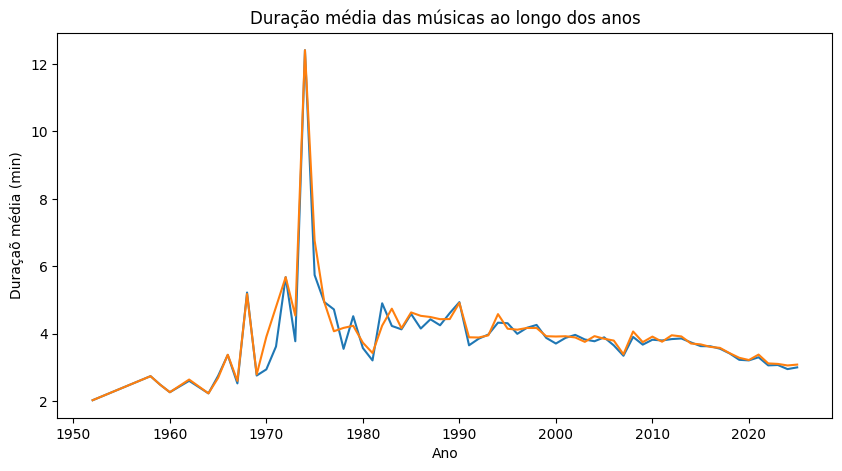

In [161]:
### criação do gráfico de duração média das músicas ao longo dos anos, utilizando o sub-dataframe ###
### matplotlib.
plt.figure(figsize=(10,5))
plt.plot(mediana_por_ano["year"], mediana_por_ano["track_duration_min"])
plt.plot(media_por_ano["year"], media_por_ano["track_duration_min"])
plt.xlabel("Ano")
plt.ylabel("Duraçaõ média (min)")
plt.title('Duração média das músicas ao longo dos anos')
plt.show()

Aqui, é possível observar um pico entre os anos de 1970 e 1980. Isso se deve, principalmente, pela pouca quantidade de músicas lançadas entre esses anos, neste dataset em específico que estamos trabalhando. Por ter uma quantidade muito baixa de dado, qualquer música com uma duração mais incomum ('maior') acaba ocasionando essa grande variação. 

Pensando na melhor visualização gráfica, tomarei a liberdade de excluir de nossa análise a música em específico que está causando a pertubação.

In [162]:

media_por_ano

,year,track_duration_min
0,1952,2.028883
1,1958,2.742433
2,1959,2.489108
3,1960,2.266217
4,1962,2.642071
...,...,...
62,2021,3.382618
63,2022,3.120521
64,2023,3.105730
65,2024,3.059914


In [163]:

contagem_por_ano = df['year'].value_counts()
anos_validos = contagem_por_ano[contagem_por_ano >= 3].index

# IMPORTANTE: Sobrescreva o df principal ou use o filtrado daki pra frente
df = df[df['year'].isin(anos_validos)].copy()

# Agora check se deu certo
print(df['year'].value_counts().sort_index())

year
1962      4
1965      3
1966      5
1967      3
1968      3
1969     17
1970      8
1971      5
1973     15
1975     10
1977      7
1978      6
1979      3
1980      7
1981      3
1982      3
1983      5
1984      6
1985      6
1986     11
1987     33
1988      7
1989      6
1990      8
1991     94
1992     14
1993     51
1994     50
1995     25
1996     24
1997     26
1998     33
1999     58
2000     53
2001     69
2002     76
2003     97
2004     47
2005     83
2006     90
2007    100
2008     97
2009    145
2010    240
2011    264
2012    330
2013    309
2014    348
2015    402
2016    383
2017    471
2018    533
2019    500
2020    494
2021    448
2022    475
2023    525
2024    658
2025    768
Name: count, dtype: int64


In [164]:
df['year'].value_counts().sort_index()

year
1962      4
1965      3
1966      5
1967      3
1968      3
1969     17
1970      8
1971      5
1973     15
1975     10
1977      7
1978      6
1979      3
1980      7
1981      3
1982      3
1983      5
1984      6
1985      6
1986     11
1987     33
1988      7
1989      6
1990      8
1991     94
1992     14
1993     51
1994     50
1995     25
1996     24
1997     26
1998     33
1999     58
2000     53
2001     69
2002     76
2003     97
2004     47
2005     83
2006     90
2007    100
2008     97
2009    145
2010    240
2011    264
2012    330
2013    309
2014    348
2015    402
2016    383
2017    471
2018    533
2019    500
2020    494
2021    448
2022    475
2023    525
2024    658
2025    768
Name: count, dtype: int64

In [165]:
media_por_ano = (
    df.groupby("year")["track_duration_min"].mean().reset_index()
)

mediana_por_ano = (
    df.groupby("year")["track_duration_min"].median().reset_index()
)

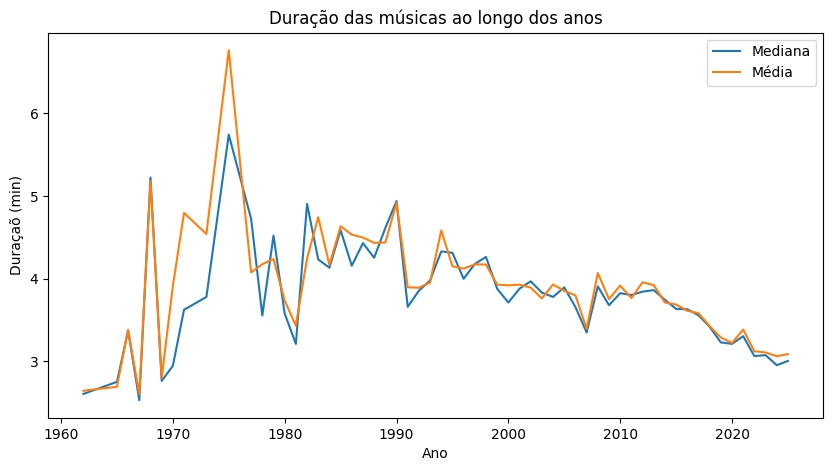

In [166]:
### criação de NOVO gráfico de duração média das músicas ao longo dos anos, utilizando os sub-dataframes de média e mediana ###
### matplotlib.
plt.figure(figsize=(10,5))

plt.plot(mediana_por_ano["year"], mediana_por_ano["track_duration_min"], label='Mediana')
plt.plot(media_por_ano["year"], media_por_ano["track_duration_min"], label='Média')
plt.legend()
plt.xlabel("Ano")
plt.ylabel("Duraçaõ (min)")
plt.title('Duração das músicas ao longo dos anos')
plt.show()

Neste gráfico é possível observar com clareza a tendência geral da duração das músicas ao longo dos anos, que têm seu pico entre a decáda de 60 e 70, muito provavelmente pela ascensão do rock e blues, e que, mais próximo da contemporaneidade, começa a descer para músicas entre 3 a 4 minutos em média.

In [167]:
contador = Counter()

df['artist_genres'].apply(lambda lista: contador.update(lista) if 'unknown' not in lista and 'soundtrack' not in lista else 0)

contador.most_common(10)

[('pop', 383),
 ('rap', 300),
 ('country', 263),
 ('rock', 262),
 ('soft pop', 222),
 ('art pop', 179),
 ('hip hop', 145),
 ('dark r&b', 119),
 ('nu metal', 117),
 ('edm', 112)]

In [168]:
df_generos_explodido = df.explode('artist_genres')

# desconsiderando gêneros desconhecidos e trilhas-sonoras('soundtrack')
df_generos_explodido = df_generos_explodido.loc[df_generos_explodido['artist_genres'] != 'unknown']
df_generos_explodido = df_generos_explodido.loc[df_generos_explodido['artist_genres'] != 'soundtrack']
df_generos_explodido = df_generos_explodido.loc[df_generos_explodido['artist_genres'].notna()]

In [169]:
df_genero_popularidade = (
    df_generos_explodido
    .groupby(['year', 'artist_genres'])['track_popularity']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

df_genero_popularidade['track_popularity'] = (
    df_genero_popularidade['track_popularity'].apply(
        lambda popularidade: float(f'{popularidade:.1f}')
        )
    )

pd.set_option('display.max_rows', 20)
df_genero_popularidade.head(100)

,year,artist_genres,track_popularity
0,2025,pop soul,90.3
1,2025,latin,89.5
2,2025,reggaeton,89.5
3,2025,trap latino,89.5
4,2025,urbano latino,89.5
...,...,...,...
95,1980,glam rock,81.0
96,2007,nu metal,81.0
97,1999,skate punk,81.0
98,1971,soul,81.0


In [170]:
contador_generos = df_generos_explodido['artist_genres'].value_counts()

top_generos = contador_generos.head(5).reset_index()
top_generos_lista = top_generos['artist_genres'].tolist()
top_generos_lista

['pop', 'rap', 'country', 'rock', 'soft pop']

In [171]:
df_genero_ano_filtrado = df_genero_popularidade.loc[df_genero_popularidade['artist_genres'].isin(top_generos_lista)]
df_genero_ano_filtrado

,year,artist_genres,track_popularity
23,2004,rap,85.0
31,1979,rock,84.5
36,2025,rap,84.0
37,2000,rap,84.0
40,1999,rock,83.5
...,...,...,...
1832,1991,rock,27.9
1838,1970,rock,27.3
1971,1990,country,13.0
2031,1998,rock,2.0


In [172]:
df_genero_popularidade['track_popularity'].reset_index()


,index,track_popularity
0,0,90.3
1,1,89.5
2,2,89.5
3,3,89.5
4,4,89.5
...,...,...
2152,2152,0.0
2153,2153,0.0
2154,2154,0.0
2155,2155,0.0


In [173]:
df_genero_popularidade

,year,artist_genres,track_popularity
0,2025,pop soul,90.3
1,2025,latin,89.5
2,2025,reggaeton,89.5
3,2025,trap latino,89.5
4,2025,urbano latino,89.5
...,...,...,...
2152,2002,celtic rock,0.0
2153,2018,acid rock,0.0
2154,2025,country hip hop,0.0
2155,2017,motown,0.0


In [174]:
df_plot = df_genero_ano_filtrado.groupby(['year', 'artist_genres'])['track_popularity'].mean().reset_index()

df_plot

df_plot = (
    df_genero_ano_filtrado
    .groupby(['year', 'artist_genres'])['track_popularity']
    .mean()
    .reset_index()
)   

df_plot

,year,artist_genres,track_popularity
0,1966,rock,82.0
1,1968,rock,72.0
2,1970,country,49.0
3,1970,rock,27.3
4,1971,rock,79.0
...,...,...,...
146,2024,soft pop,63.0
147,2025,country,58.5
148,2025,pop,71.3
149,2025,rap,84.0


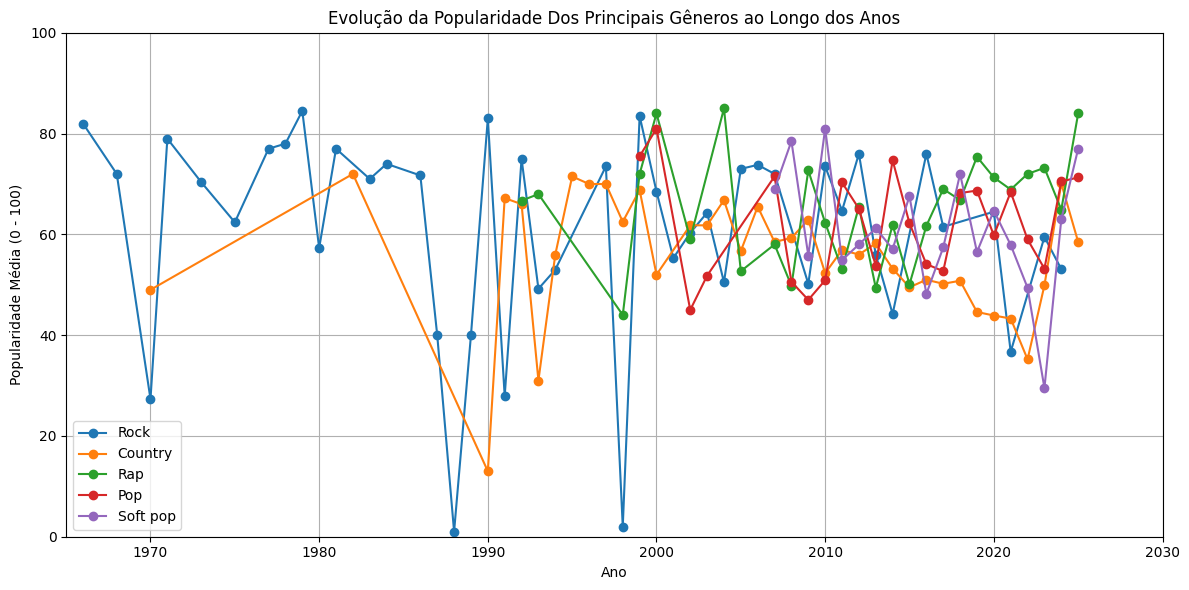

In [179]:

plt.figure(figsize=(12, 6))

for genre in df_plot['artist_genres'].unique():
    df_temp = df_plot.loc[df_plot['artist_genres'] == genre]
    plt.plot(df_temp['year'], df_temp['track_popularity'], marker='o', label=genre.capitalize())

plt.title('Evolução da Popularidade Dos Principais Gêneros ao Longo dos Anos')
plt.xlabel('Ano')
plt.xlim(1965, 2030)
plt.ylabel('Popularidade Média (0 - 100)')
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()